In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv("/content/drive/MyDrive/ImpactSense/dataset/earthquake.zip")
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [43]:
df.shape

(1300, 6)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [45]:
df.isnull().sum()

,0
magnitude,0
depth,0
cdi,0
mmi,0
sig,0
alert,0


In [46]:
df.duplicated().sum()

np.int64(44)

In [47]:
df = df.drop_duplicates()

In [48]:
df.duplicated().sum()

np.int64(0)

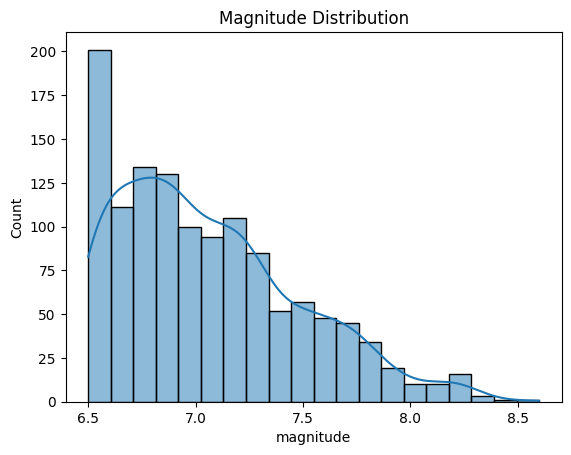

In [49]:
sns.histplot(df['magnitude'], kde=True)
plt.title("Magnitude Distribution")
plt.show()

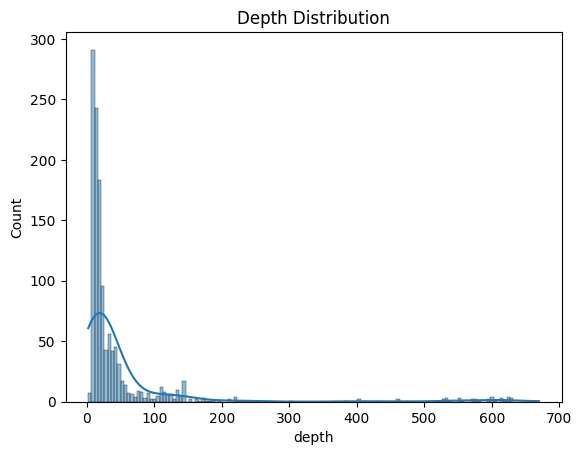

In [50]:
sns.histplot(df['depth'], kde=True)
plt.title("Depth Distribution")
plt.show()

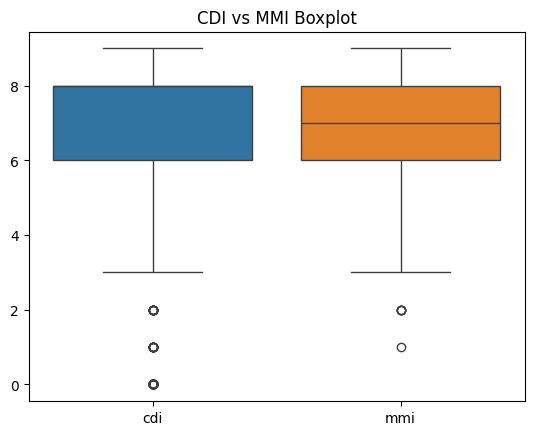

In [51]:
sns.boxplot(df[['cdi','mmi']])
plt.title("CDI vs MMI Boxplot")
plt.show()

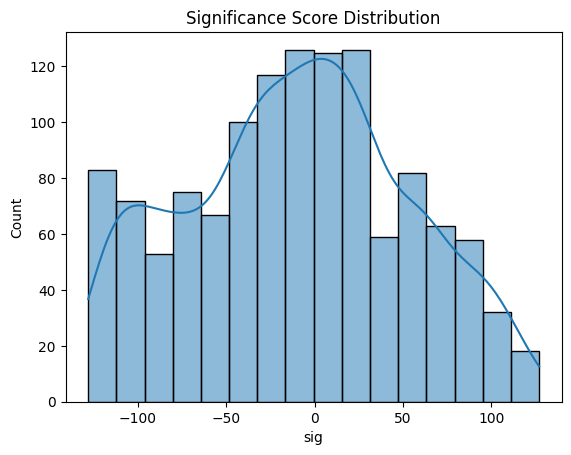

In [52]:
sns.histplot(df['sig'], kde=True)
plt.title("Significance Score Distribution")
plt.show()

In [55]:
df['alert'] = df['alert'].astype(str).str.strip()
df['alert'] = df['alert'].astype('category')

In [56]:
df = pd.read_csv("/content/drive/MyDrive/ImpactSense/dataset/earthquake.zip")

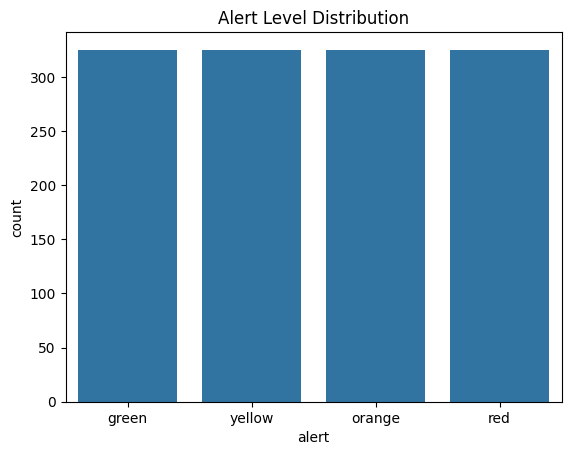

In [57]:
sns.countplot(x=df['alert'])
plt.title("Alert Level Distribution")
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['alert'] = le.fit_transform(df['alert'])

In [59]:
X = df[['magnitude', 'depth', 'cdi', 'mmi', 'sig']]
y = df['alert']

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols = ['magnitude','depth','cdi','mmi'	,'sig','alert']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

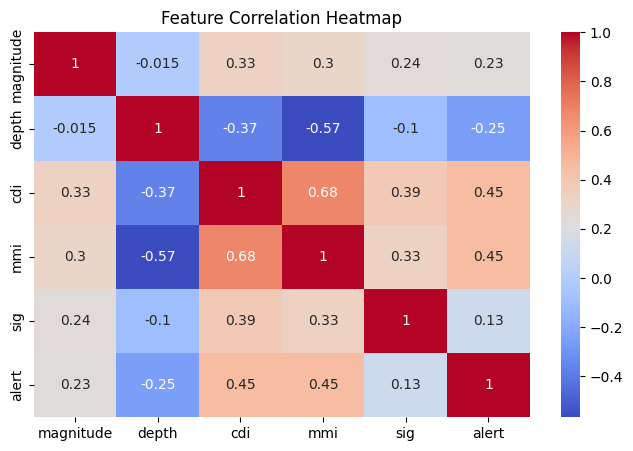

In [62]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)